<a href="https://colab.research.google.com/github/yaajnu/ColabNotebooks/blob/master/Sales_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1:Which Month had the most sales?




In [ ]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import datetime as dt
df=pd.read_csv('./Data/Sales_January_2019.csv')

In [ ]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,9697,9697,9697,9697,9697,9697
unique,9269,20,8,19,8077,9161
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,16,1171,8795,1171,16,16


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9723 entries, 0 to 9722
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          9697 non-null   object
 1   Product           9697 non-null   object
 2   Quantity Ordered  9697 non-null   object
 3   Price Each        9697 non-null   object
 4   Order Date        9697 non-null   object
 5   Purchase Address  9697 non-null   object
dtypes: object(6)
memory usage: 455.9+ KB


In [ ]:
df.isna().sum()

Order ID            26
Product             26
Quantity Ordered    26
Price Each          26
Order Date          26
Purchase Address    26
dtype: int64

In [ ]:
files=[i for i in os.listdir('Data')]
files

['Sales_February_2019.csv',
 'Sales_March_2019.csv',
 'Sales_July_2019.csv',
 'Sales_April_2019.csv',
 'Sales_December_2019.csv',
 'Sales_October_2019.csv',
 'Sales_January_2019.csv',
 'Sales_May_2019.csv',
 'Sales_August_2019.csv',
 'Sales_September_2019.csv',
 'Sales_November_2019.csv',
 'Sales_June_2019.csv']

In [ ]:
all_data=pd.DataFrame()

In [ ]:
pd.read_csv('./Data/Sales_February_2019.csv')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101"
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016"
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001"
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301"
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101"
...,...,...,...,...,...,...
12031,162004,Apple Airpods Headphones,1,150,02/12/19 22:02,"227 Church St, San Francisco, CA 94016"
12032,162005,AAA Batteries (4-pack),2,2.99,02/04/19 20:44,"417 Jefferson St, Los Angeles, CA 90001"
12033,162006,USB-C Charging Cable,1,11.95,02/24/19 06:31,"498 8th St, Atlanta, GA 30301"
12034,162007,USB-C Charging Cable,1,11.95,02/24/19 19:09,"715 7th St, Dallas, TX 75001"


In [ ]:
all_month=pd.DataFrame()
for file in files:
  df=pd.read_csv('./Data/{}'.format(file))
  all_month=pd.concat([all_month,df],ignore_index=True)

In [ ]:
my_dict={}
for i,file in enumerate(files):
  my_dict[i]=pd.read_csv('./Data/{}'.format(file))


In [ ]:
check=pd.DataFrame()
for i,file in enumerate(files):
  check=pd.concat([check,my_dict[i]],ignore_index=True)


In [ ]:
check.equals(all_month)

True

In [ ]:
all_month=all_month.dropna()

In [ ]:
all_month

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101"
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016"
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001"
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301"
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101"
...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


In [ ]:
all_month['Month']=all_month['Order Date'].apply(lambda x:x[:2])

In [ ]:
all_month['Month'].unique()

array(['02', '03', 'Or', '04', '07', '08', '05', '12', '01', '10', '11',
       '06', '09'], dtype=object)

In [ ]:
all_month.drop(all_month[all_month['Month']=='Or'].index,inplace=True)

In [ ]:
all_month['Price Each']=all_month['Price Each'].astype('float32')

In [ ]:
all_month['Quantity Ordered']=all_month['Quantity Ordered'].astype('float32')

In [ ]:
all_month['Amount']=all_month['Quantity Ordered']*all_month['Price Each']

In [ ]:
all_month

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Amount
0,150502,iPhone,1.0,700.000000,02/18/19 01:35,"866 Spruce St, Portland, ME 04101",02,700.000000
1,150503,AA Batteries (4-pack),1.0,3.840000,02/13/19 07:24,"18 13th St, San Francisco, CA 94016",02,3.840000
2,150504,27in 4K Gaming Monitor,1.0,389.989990,02/18/19 09:46,"52 6th St, New York City, NY 10001",02,389.989990
3,150505,Lightning Charging Cable,1.0,14.950000,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301",02,14.950000
4,150506,AA Batteries (4-pack),2.0,3.840000,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101",02,7.680000
...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1.0,2.990000,06/07/19 19:02,"795 Pine St, Boston, MA 02215",06,2.990000
186846,222906,27in FHD Monitor,1.0,149.990005,06/01/19 19:29,"495 North St, New York City, NY 10001",06,149.990005
186847,222907,USB-C Charging Cable,1.0,11.950000,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",06,11.950000
186848,222908,USB-C Charging Cable,1.0,11.950000,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",06,11.950000


In [ ]:
all_month.groupby('Month').aggregate('sum').sort_values('Amount')

,Quantity Ordered,Price Each,Amount
Month,,,
01,10903.0,1811768.375,1822256.75
09,13109.0,2084992.125,2097560.00
02,13449.0,2188884.750,2202022.50
08,13448.0,2230345.500,2244467.75
06,15253.0,2562025.500,2577802.25
07,16072.0,2632539.500,2647775.75
03,17005.0,2791207.750,2807100.25
05,18667.0,3135125.000,3152606.75
11,19798.0,3180600.750,3199603.25


Data cleaning steps before this which involved removing blank rows and creating an additional month column

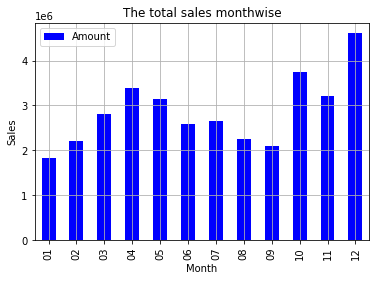

In [ ]:
all_month.groupby('Month').aggregate('sum').plot.bar(y='Amount',color='blue')
plt.ylabel('Sales')
plt.title('The total sales monthwise')
plt.grid()


Question 2:Which city has recorded the most sales?

In [ ]:
pd.to_numeric(all_month['Month'].unique())

array([ 2,  3,  4,  7,  8,  5, 12,  1, 10, 11,  6,  9])

In [ ]:
all_month

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Amount
0,150502,iPhone,1.0,700.000000,02/18/19 01:35,"866 Spruce St, Portland, ME 04101",02,700.000000
1,150503,AA Batteries (4-pack),1.0,3.840000,02/13/19 07:24,"18 13th St, San Francisco, CA 94016",02,3.840000
2,150504,27in 4K Gaming Monitor,1.0,389.989990,02/18/19 09:46,"52 6th St, New York City, NY 10001",02,389.989990
3,150505,Lightning Charging Cable,1.0,14.950000,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301",02,14.950000
4,150506,AA Batteries (4-pack),2.0,3.840000,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101",02,7.680000
...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1.0,2.990000,06/07/19 19:02,"795 Pine St, Boston, MA 02215",06,2.990000
186846,222906,27in FHD Monitor,1.0,149.990005,06/01/19 19:29,"495 North St, New York City, NY 10001",06,149.990005
186847,222907,USB-C Charging Cable,1.0,11.950000,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",06,11.950000
186848,222908,USB-C Charging Cable,1.0,11.950000,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",06,11.950000


In [ ]:
regex=re.compile(',(.*),')
f=regex.search(all_month['Purchase Address'][0])

In [ ]:
f.group(1).strip()

'Portland'

In [ ]:
all_month['City']=all_month['Purchase Address'].apply(lambda x:regex.search(x).group(1).strip())

In [ ]:
all_month['City'].unique()

array(['Portland', 'San Francisco', 'New York City', 'Atlanta', 'Seattle',
       'Austin', 'Los Angeles', 'Dallas', 'Boston'], dtype=object)

In [ ]:
all_month.groupby('City').aggregate('sum').sort_values('Amount',ascending=False)

,Quantity Ordered,Price Each,Amount
City,,,
San Francisco,50239.0,8211461.500,8262204.00
Los Angeles,33289.0,5421435.000,5452571.00
New York City,27932.0,4635371.000,4664317.50
Boston,22528.0,3637409.750,3661642.00
Atlanta,16602.0,2779908.250,2795498.50
Dallas,16730.0,2752627.750,2767975.50
Seattle,16553.0,2733296.000,2747755.50
Portland,14053.0,2307747.500,2320490.50
Austin,11153.0,1809873.625,1819581.75


Text(0.5, 1.0, 'Sales by city')

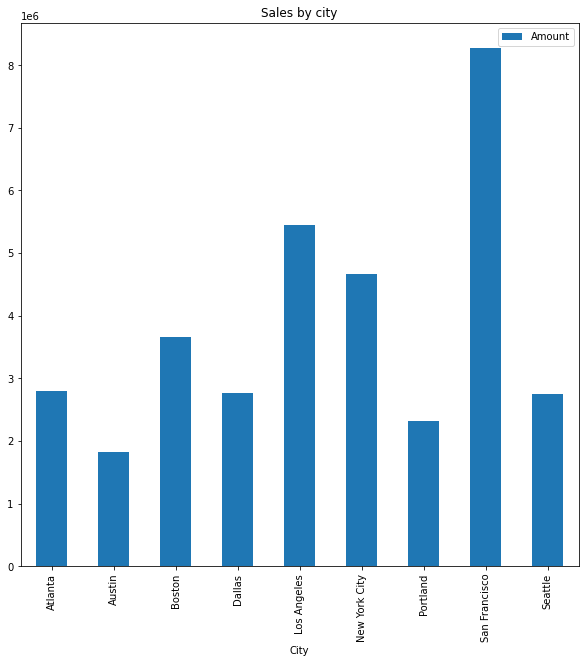

In [ ]:
all_month.groupby('City').aggregate('sum').plot.bar(y='Amount',figsize=(10,10))
plt.title('Sales by city')

Question 3:WHat time should advertisment be shown to maximize purchase


In [ ]:
all_month['Order Date']=pd.to_datetime(all_month['Order Date'])

In [ ]:
all_month['Order Time']=all_month['Order Date'].dt.time

In [ ]:
all_month['Hour']=all_month['Order Date'].dt.hour

In [ ]:
all_month

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Amount,City,Order Time,Hour
0,150502,iPhone,1.0,700.000000,2019-02-18 01:35:00,"866 Spruce St, Portland, ME 04101",02,700.000000,Portland,01:35:00,1
1,150503,AA Batteries (4-pack),1.0,3.840000,2019-02-13 07:24:00,"18 13th St, San Francisco, CA 94016",02,3.840000,San Francisco,07:24:00,7
2,150504,27in 4K Gaming Monitor,1.0,389.989990,2019-02-18 09:46:00,"52 6th St, New York City, NY 10001",02,389.989990,New York City,09:46:00,9
3,150505,Lightning Charging Cable,1.0,14.950000,2019-02-02 16:47:00,"129 Cherry St, Atlanta, GA 30301",02,14.950000,Atlanta,16:47:00,16
4,150506,AA Batteries (4-pack),2.0,3.840000,2019-02-28 20:32:00,"548 Lincoln St, Seattle, WA 98101",02,7.680000,Seattle,20:32:00,20
...,...,...,...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1.0,2.990000,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",06,2.990000,Boston,19:02:00,19
186846,222906,27in FHD Monitor,1.0,149.990005,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",06,149.990005,New York City,19:29:00,19
186847,222907,USB-C Charging Cable,1.0,11.950000,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",06,11.950000,San Francisco,18:57:00,18
186848,222908,USB-C Charging Cable,1.0,11.950000,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",06,11.950000,San Francisco,18:35:00,18


([<matplotlib.axis.XTick at 0x7f5fc2b11da0>,
 <a list of 24 Text major ticklabel objects>)

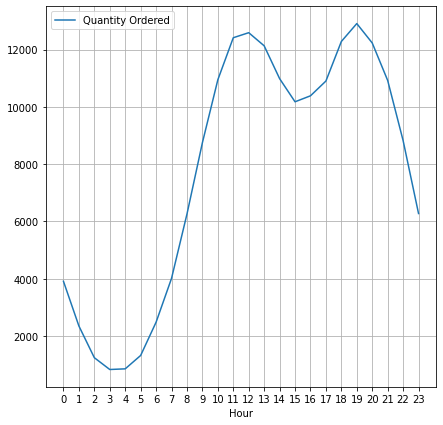

In [ ]:
all_month.groupby('Hour').count().plot(y='Quantity Ordered',figsize=(7,7))
values=[i for i,j in all_month.groupby('Hour')]
plt.grid(True)
plt.xticks(values)

Question 4:Which items are bought together in pairs the most ?

In [ ]:
len(all_month['Order Date'].unique())

142395

In [ ]:
len(all_month['Order ID'].unique())

178437

In [ ]:
all_multi_orders=all_month[all_month.duplicated(subset=['Order ID'],keep=False)]

In [ ]:
orders=all_multi_orders['Order ID'].unique()

In [ ]:
orders

array(['150518', '150582', '150590', ..., '222882', '222884', '222903'],
      dtype=object)

In [ ]:
all_multi_orders[all_multi_orders['Order ID']=='150518']['Product'].values[1]

'iPhone'

In [ ]:
order_pairs=[]
def order_pair(x):
    return all_multi_orders[all_multi_orders['Order ID']==x]['Product'].values[0],all_multi_orders[all_multi_orders['Order ID']==x]['Product'].values[1]

In [ ]:
all_multi_orders['Order Pairs']=all_multi_orders['Order ID'].apply(lambda x:order_pair(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
all_multi_orders.groupby('Order Pairs').count().sort_values('Quantity Ordered')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Amount,City,Order Time,Hour
Order Pairs,,,,,,,,,,,
"(iPhone, iPhone)",2,2,2,2,2,2,2,2,2,2,2
"(ThinkPad Laptop, 27in 4K Gaming Monitor)",2,2,2,2,2,2,2,2,2,2,2
"(Macbook Pro Laptop, Flatscreen TV)",2,2,2,2,2,2,2,2,2,2,2
"(27in FHD Monitor, Google Phone)",2,2,2,2,2,2,2,2,2,2,2
"(27in FHD Monitor, LG Washing Machine)",2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...
"(iPhone, Apple Airpods Headphones)",653,653,653,653,653,653,653,653,653,653,653
"(iPhone, Wired Headphones)",725,725,725,725,725,725,725,725,725,725,725
"(Vareebadd Phone, USB-C Charging Cable)",773,773,773,773,773,773,773,773,773,773,773


In [ ]:
all_multi_orders

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Amount,City,Order Time,Hour,Order Pairs
16,150518,Macbook Pro Laptop,1.0,1700.00,2019-02-26 12:38:00,"847 10th St, San Francisco, CA 94016",02,1700.00,San Francisco,12:38:00,12,"(Macbook Pro Laptop, iPhone)"
17,150518,iPhone,1.0,700.00,2019-02-26 12:38:00,"847 10th St, San Francisco, CA 94016",02,700.00,San Francisco,12:38:00,12,"(Macbook Pro Laptop, iPhone)"
82,150582,iPhone,1.0,700.00,2019-02-16 23:38:00,"678 Maple St, Seattle, WA 98101",02,700.00,Seattle,23:38:00,23,"(iPhone, Lightning Charging Cable)"
83,150582,Lightning Charging Cable,1.0,14.95,2019-02-16 23:38:00,"678 Maple St, Seattle, WA 98101",02,14.95,Seattle,23:38:00,23,"(iPhone, Lightning Charging Cable)"
91,150590,Apple Airpods Headphones,1.0,150.00,2019-02-08 09:35:00,"196 River St, San Francisco, CA 94016",02,150.00,San Francisco,09:35:00,9,"(Apple Airpods Headphones, AAA Batteries (4-pa..."
...,...,...,...,...,...,...,...,...,...,...,...,...
186820,222882,AA Batteries (4-pack),1.0,3.84,2019-06-18 11:37:00,"990 Walnut St, Los Angeles, CA 90001",06,3.84,Los Angeles,11:37:00,11,"(Apple Airpods Headphones, AA Batteries (4-pack))"
186822,222884,Google Phone,1.0,600.00,2019-06-04 12:06:00,"819 Pine St, New York City, NY 10001",06,600.00,New York City,12:06:00,12,"(Google Phone, USB-C Charging Cable)"
186823,222884,USB-C Charging Cable,1.0,11.95,2019-06-04 12:06:00,"819 Pine St, New York City, NY 10001",06,11.95,New York City,12:06:00,12,"(Google Phone, USB-C Charging Cable)"
186842,222903,iPhone,1.0,700.00,2019-06-07 22:21:00,"685 Hickory St, New York City, NY 10001",06,700.00,New York City,22:21:00,22,"(iPhone, Lightning Charging Cable)"


In [ ]:
final=all_multi_orders[['Order ID',"Order Pairs"]].drop_duplicates()

In [ ]:
final

,Order ID,Order Pairs
16,150518,"(Macbook Pro Laptop, iPhone)"
82,150582,"(iPhone, Lightning Charging Cable)"
91,150590,"(Apple Airpods Headphones, AAA Batteries (4-pa..."
119,150617,"(Google Phone, USB-C Charging Cable)"
154,150651,"(Google Phone, USB-C Charging Cable)"
...,...,...
186798,222863,"(27in FHD Monitor, Bose SoundSport Headphones)"
186804,222868,"(iPhone, Apple Airpods Headphones)"
186819,222882,"(Apple Airpods Headphones, AA Batteries (4-pack))"
186822,222884,"(Google Phone, USB-C Charging Cable)"


In [ ]:
final.groupby('Order Pairs').count().sort_values('Order ID')

,Order ID
Order Pairs,
"(iPhone, iPhone)",1
"(ThinkPad Laptop, 27in 4K Gaming Monitor)",1
"(Macbook Pro Laptop, Flatscreen TV)",1
"(27in FHD Monitor, Google Phone)",1
"(27in FHD Monitor, LG Washing Machine)",1
...,...
"(iPhone, Apple Airpods Headphones)",313
"(Vareebadd Phone, USB-C Charging Cable)",361
"(iPhone, Wired Headphones)",362


In [ ]:
from itertools import combinations
from collections import Counter
import pprint
count=Counter()
for i in final['Order Pairs']:
  count.update(combinations(list(i),2))

In [ ]:
print(count.most_common(10))

[(('iPhone', 'Lightning Charging Cable'), 1001), (('Google Phone', 'USB-C Charging Cable'), 984), (('iPhone', 'Wired Headphones'), 362), (('Vareebadd Phone', 'USB-C Charging Cable'), 361), (('iPhone', 'Apple Airpods Headphones'), 313), (('Google Phone', 'Wired Headphones'), 306), (('Google Phone', 'Bose SoundSport Headphones'), 185), (('Vareebadd Phone', 'Wired Headphones'), 107), (('Vareebadd Phone', 'Bose SoundSport Headphones'), 64), (('Lightning Charging Cable', 'USB-C Charging Cable'), 55)]
